# Hands On Astropy Tutorial 
**Tutors:** Axel Donath and Christoph Deil

This hands-on tutorial gives an introduction and overview of the [Astropy](http://www.astropy.org/) Python package for Astronomy.

## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few **exercises with different levels of difficulty** (*easy*, *advanced* and *hard*). We will give you **~15-20 min to solve the exercises** and present a possible solution afterwards. In case we don't have time to show all the solutions or in the likely case that you don't manage to solve all of them: we provide a **sample solution** for all exercises in the [solutions notebook](astropy_hands_on_solutions.ipynb) you can look at **after the course**.   

The estimated time for this tutorial is ~3 hours. Feel free to **interrupt at any time** to ask questions or **talk to the assisting tutors** when you encounter errors or the code doesn't work as expected. We have marked some of the sections that deal with more advanced topics as "optional". 

We're happy to receive any **feedback or questions** on the tutorial via mail to *axel.donath@mpi-hd.mpg.de* or using the 
repository's [issue tracker](https://github.com/Asterics2020-Obelics/School2019/issues). 

## What is Astropy?

![](astropy_banner_96.png)

    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."


The concept and structure of the package is decribed in more detail in the first [Astropy paper 2013](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A). The development infrastructure
and status of the v2.0 core package is described in the second [Astropy paper 2018](http://adsabs.harvard.edu/abs/2018AJ....156..123A).

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and the [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

5. (optional) Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)

In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks, such as:

- [Astroplan](https://astroplan.readthedocs.io/en/latest/): observation planning
- [Reproject](http://reproject.readthedocs.io/en/stable/): reprojection of sky images
- [Regions](http://astropy-regions.readthedocs.io/en/latest/): handling of sky regions 
- [Photutils](https://photutils.readthedocs.io/en/stable/): source detection and photometry
- [Gammapy](docs.gammapy.org): gamma-ray Astronomy data analysis
- ...and many others, or maybe your package?


## Other Ressources

There are other ressources with Astropy tutorials, we can recommend:

- [Learn.Astropy](http://learn.astropy.org) webpage with a lot of tutorial material.
- [Astropy documentation](http://docs.astropy.org) webpage, with lots of small usage examples.
- [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository (same as linked on Learn.Astropy)
- [Astropy workshop](https://github.com/astropy/astropy-workshop) held the AAS meeting 2019. 
- [STAK project](https://stak-notebooks.readthedocs.io/en/latest/) provided by STSci, with tutorial notebooks for typical IRAF analysis tasks. 
- [Webinar on Youtube](https://www.youtube.com/watch?v=YP42k3J08_o&list=PL7kL5D8ITGyV7zeT-oADweFKHsZNh3tKV) provided by Astronomy Data and Computing Services (ADACS). 

As the content that can be covered in this ~3 hour tutorial is very limited, we recommend to also **check-out the ressources** listed above after the school.

See https://www.astropy.org/help.html for list of references how to **get help on Astropy**.

If you would like to contribute to Astropy, please start by reading the [contribute page](http://www.astropy.org/contribute.html)
on the website.

Let's start with the setup and check of the notebook:

## 0. Setup

Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.16.2
astropy: 3.1.1


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

### 1.1. Basics
The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number with a unit object:

In [4]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


Or by passing a string to the general `Quantity` object:

In [5]:
distance = u.Quantity('1 lyr')

Check the availabe units with tab completion on the units module, `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [6]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[ 1.  3. 10.] lyr
[ 1.  3. 10.] lyr


In [7]:
distances.value

array([ 1.,  3., 10.])

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [8]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [9]:
distances.unit

Unit("lyr")

In [10]:
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [11]:
distances * 10

<Quantity [ 10.,  30., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [12]:
np.max(distances)

<Quantity 10. lyr>

In [13]:
np.mean(distances)

<Quantity 4.66666667 lyr>

But there are exceptions, where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless, such as:

In [14]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (10 * u.MeV))

<Quantity 1.09861229>

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [15]:
distance.to('meter')

<Quantity 9.46073047e+15 m>

In [16]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [17]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [18]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


For standardized unit systems such as `'si'` or `'cgs'` there are convenience attributes on the quantity object:

In [19]:
speed_of_light.si

<Quantity 2.99792458e+08 m / s>

In [20]:
speed_of_light.cgs

<Quantity 2.99792458e+10 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handled with the concept of "equivalencies".  

For example consider units to measure spectral quantities such as wavelength, frequency and energy:

In [21]:
frequency = 3e20 * u.hertz
frequency.to('MeV', equivalencies=u.spectral())

<Quantity 1.2407003 MeV>

In [22]:
frequency.to('picometer', equivalencies=u.spectral())

<Quantity 0.99930819 pm>

Or for converting temperatures:

In [23]:
temperature = 25 * u.Celsius

In [24]:
temperature.to("Kelvin", equivalencies=u.temperature())

<Quantity 298.15 K>

In [25]:
with u.imperial.enable():
    print(temperature.to("deg_F", equivalencies=u.temperature()))

77.0 deg_F


### 1.3 Miscellaneous

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [26]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

If you write a function you can make sure the input is given in the right units using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

In [27]:
@u.quantity_input(frequency=u.hertz, temperature=u.K)
def blackbody(frequency, temperature): 
    pre_factor = 2 * (const.h * frequency ** 3) / const.c ** 2
    exponential_factor = 1. / (np.exp((const.h * frequency) / (const.k_B * temperature)) - 1)
    return pre_factor * exponential_factor

In [28]:
# blackbody(300 * u.nm, 500 * u.K)

### 1.4 Interfacing quantities with third-party code (optional) 

When writing code that uses quantities we are typically bound to use it everywhere in the code. But often we'd like to interface with functions (e.g. from [SciPy](https://www.scipy.org/) or [Matplotlib](https://matplotlib.org/)) or other third-party code that doesn't know how to handle quantities.

For Matplotlib, Astropy has a builtin support using the [quantity_support()](http://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html) context manager:

/Users/adonath/software/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/units/quantity.py:463: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


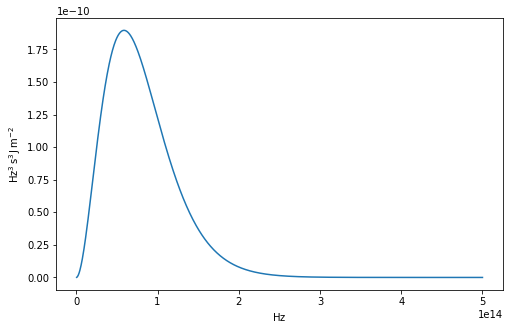

In [29]:
from astropy.visualization import quantity_support

plt.figure(figsize=(8, 5))

temperature = 1000 * u.K
frequencies = np.linspace(1E-5, 0.5e15, 1000) * u.hertz

radiance = blackbody(frequency=frequencies, temperature=temperature)

with quantity_support():   
    plt.plot(frequencies, radiance)

But in other cases there is only the option to convert the quantity to well defined units, strip off the unit and re-attach it after the computation:

In [30]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
print(energies)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] TeV


### 1.5 Performance Tips (optional)

As the main data structure of the Quantity is a standard numpy array, they are suitable for computations with large arrays. Still you have to take care of a few pitfalls.

When creating a Quantity with `data * u.km` or `data * u.Unit()` by default a copy of the data is made:

In [31]:
values = np.ones((500, 500, 500))

In [32]:
%%timeit
quantity = values * u.kpc

311 ms ± 5.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If you would like to avoid the copy you can use:

In [33]:
%%timeit
quantity = u.Quantity(values, unit="kpc", copy=False)

6.92 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In Astropy > 3.1 a new operator was introduced to achieve the same behaviour:

In [34]:
%%timeit
quantity = values << u.Unit("kpc")

10.6 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


To avoid copies when converting to different units and getting the values, you can use: 

In [35]:
quantity = u.Quantity(values, unit="kpc", copy=False)
values = quantity.to_value("m")

Instead of using`quantity.to("m").value`.  More details can be found on http://docs.astropy.org/en/stable/units/index.html#performance-tips.

### 1.6 Exercises

- (*easy*) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years? 
- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the [Astropy documentation on combining and defining units](http://docs.astropy.org/en/stable/units/combining_and_defining.html) for an example how to do this (For other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)
- (*expert*) Find the frequency with the maximum photon rate of the black body spectrum $\mathcal{B}(\nu, T)$ with temperature $T=5000~\mathrm{K}$. For this you can use a numerical optimization routine such as [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
As the frequency as well as the radiance can cover many orders of magnitude, the stability of the algorithm can be much improved by minimizing the (negative) logarithm of the radiance $-\log{\mathcal{B}}$ as well as minimizing with respect to the logarithm of the frequency by introducing the variable $x = \log{\nu}$. Finally compare the result against the analytical solution from [Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law). 

## 2. Coordinates

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [36]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [37]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.01)>


As for `Quantities` the instanciation with `lists`, `arrays` or even `Quantities` also works:

In [38]:
positions = SkyCoord([345., 234.3] * u.deg,  [-0.1, 0.2] * u.deg, frame='galactic')

Alternatively the angles can be specified as string:

In [39]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10',
                         unit=(u.hour, u.deg), frame='icrs')

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [40]:
# SkyCoord.from_name('Crab')

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [41]:
pos_gal = position_crab.transform_to('galactic')

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [42]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

In [43]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [44]:
position_crab.data.lon

<Longitude 5.57554722 hourangle>

In [45]:
position_crab.data.lat

<Latitude 22.01447222 deg>

### 2.2 Measuring distances between positions in the sky
The angular distance between two [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) objects, can be found using the [SkyCoord.separation()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.separation) method:

In [46]:
#position_saga = SkyCoord.from_name('Sag A*')
position_saga = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

position_crab.separation(position_saga)

<Angle 172.64076197 deg>

In [47]:
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

### 2.3 ALT - AZ coordinates (optional)

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

In [48]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [49]:
paris = EarthLocation(lat=48.8567 * u.deg, lon=2.3508 * u.deg)
print(paris.geodetic)

GeodeticLocation(lon=<Longitude 2.3508 deg>, lat=<Latitude 48.8567 deg>, height=<Quantity 7.2605446e-10 m>)


And a time using the [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html) object:

In [50]:
now = Time.now()
print(now)

2019-04-15 09:03:27.757036


Now we can define a horizontal coordinate system using the [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) class and use it to convert from the sky coordinate:

In [51]:
altaz = AltAz(obstime=now, location=paris)
crab_altaz = position_crab.transform_to(altaz)
print(crab_altaz)

<SkyCoord (AltAz: obstime=2019-04-15 09:03:27.757036, location=(4200910.64325784, 172456.78503911, 4780088.65877593) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (66.29666875, 8.67150744)>


### 2.4 Exercises

- (*easy*) Define the sky coordinate for your favorite astronomical object and find the angular distance to the Crab Nebula as well as the Galactic center.
- (*expert*) Make a plot of the height above horizon vs.time for the crab position at the location of Annecy. Mark the time range where it is visible. Would the Crab Nebula be visible tonight?

## 3. Tables

Astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables.

### 3.1 Basics

Table objects can be created as shown in the following

In [52]:
from astropy.table import Table

In [53]:
table = Table()

We add columns to the table like we would add entries to a dictionary

In [54]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A']
table['GLON'] = [184.55754381, 0, 111.74169477] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151] * u.deg

By executing the following cell, we get a nicely formatted version of the table printed in the notebook:

In [55]:
table

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.2 Accessing rows and columns

We have access to the defined columns. To check which ones are availbe you can use `Table.colnames`:

In [56]:
table.colnames

['Source_Name', 'GLON', 'GLAT']

And access individual columns just by their name:

In [57]:
table['GLON']

184.55754381
0.0
111.74169477


And also a subset of columns:

In [58]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str6,float64
Crab,184.55754381
Sag A*,0.0
Cas A,111.74169477


Often, it is handy to get the column data as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) using the `.quantity` property:

In [59]:
table['GLON'].quantity

<Quantity [184.55754381,   0.        , 111.74169477] deg>

Rows can be accessed using numpy indexing:

In [60]:
table[0:2]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0


Or by using a boolean numpy array for indexing:

In [61]:
selection = table['Source_Name'] == 'Crab'
table[selection]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369


There is also a more sophisticated indexing scheme, which is explained [here](http://docs.astropy.org/en/stable/table/indexing.html), but not covered in this tutorial.

### 3.3 Reading / Writing tables to disk
Astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers). To write the table in FITS format we can use:

In [62]:
table.write('data/example.fits', overwrite=True, format='fits')

In [63]:
table.write('data/example.ecsv', overwrite=True, format='ascii.ecsv')

In [64]:
Table.read('data/example.fits')

Source_Name,GLON,GLAT
,deg,deg
bytes6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.4. Miscellaneous

These are a few other useful operations when working with Astropy tables.

Sort by key:

In [65]:
table.sort('GLON')

In [66]:
table

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151
Crab,184.55754381,-5.78427369


Note that `.sort()` is an in place operation on the table, i.e. changes the actual table.

To remove a specific row by index:

In [67]:
table.remove_row(0)

Astropy tables also support row-wise iteration in Python loops:

In [68]:
for row in table:
    print(row['Source_Name'])

Cas A
Crab


Another useful feature for quickly inspecting the data contained in the table is the `.show_in_browser()` method:

In [69]:
table.show_in_browser(jsviewer=True)

### 3.5 Exercises

- (*easy*) Add columns with the `RA` and `DEC` coordinates of the objects to the example table.
- (*advanced *) Load the Fermi 2FHL catalog table (`'data/fermi_2fhl_catalog.fits'`) and find the brighest source (the brightness value is stored in the `'Flux50'` column). What is the common name of the source (column `'ASSOC'`)?
Find all sources within 10 deg from the position of this source.
- (*expert*) Make an allsky plot (using an 'Aitoff' projection) of all the sources in the Fermi 2FHL catalog grouped by source class (i.e. choose a different marker color for every source class). The class of the sources is stored in the `'CLASS'` column. There are a few possible ways to identify the groups of source class. One of them is to use [Table.group_by()](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.group_by) followed by a loop over the groups (check Astropy documentation!) another way is to use a regular Python `set` to idenfity the unique entries in the `'CLASS'` column and loop over those. You can use `plt.subplot(projection='aitoff')` to instanciate a matplotlib axes with `'Aitoff'` projection. Note that the `'Aitoff'` projection requires angular positions measured in radians.

## 4. FITS Images and WCS

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use image data of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), taken by the [Chandra X-ray observatory](http://chandra.harvard.edu/).

### 4.1 Basics


In [70]:
from astropy.io import fits

To open the fits file we use `fits.open()` and just specify the filename as an argument:

In [71]:
hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')

We can retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [72]:
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


It contains only one `PrimaryHDU` with data dimensions `(1024, 1024)` of format `float32`. To access the hdu we use:

In [73]:
image_hdu = hdulist['PRIMARY'] 

#or

image_hdu = hdulist[0] 

We can access the data with the `.data` attribute:

In [74]:
image_hdu.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

It is a plain 2d numpy array. We use `plt.imshow()` to visualize it:

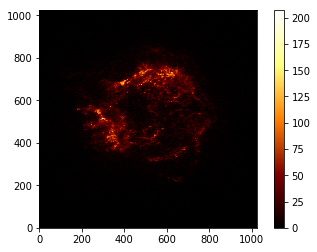

In [75]:
plt.imshow(image_hdu.data, origin='lower', cmap='afmhot')
plt.colorbar()

Additional meta information is stored in the `.header` attribute:

In [76]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

We now use the header information to create a world coordinate to pixel coordinate transformation, using the [astropy.wcs.WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html#astropy.wcs.WCS) class:

In [77]:
from astropy.wcs import WCS

In [78]:
wcs = WCS(image_hdu.header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024


Using the helper methods [SkyCoord.to_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.to_pixel) and [SkyCood.from_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.from_pixel) we can now convert every position in the image to the corresponding sky coordinate:

In [79]:
SkyCoord.from_pixel(0, 0, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

In [80]:
# position_casa = SkyCoord.from_name('Cas A')

# or

position_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

position_casa.to_pixel(wcs)

(array(511.59886806), array(511.29670003))

### 4.2 Exercises

- (*easy*) Read in the data from the other energy bands (`'data/casa_1.5-3.0keV.fits.gz'` and `'data/casa_4.0-6.0keV.fits.gz'`) as well, sum up all the data from the three energy bands. Plot the summed data using [plt.imshow()](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.imshow.html) again.

- (*advanced*) Cutout the central region of the image using [astropy.nddata.Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html) (size of 0.05 deg x 0.05 deg around the position of `'Cas A'`). Find the sky position of the brightest pixel in the cutout data. For this [np.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) and [np.unravel_index()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unravel_index.html) might be helpful. Make sure you use the updated `.data` and `.wcs` attributes of the `Cutout2D` object to achieve the latter.
   
- (*expert, very hard*) Calculate a radial profile of the image data to estimate the size of the shell of the supernova remnant. For this sum up all the data that is contained in the rings (specified  by `radii_min` and `radii_max`) around the center position of *Cas A*. Choose a total minimum radius of `0 arcmin` and total maximum radius of `5 arcmin` divided in 50 steps. You can use [np.indices()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.indices.html) to get arrays of x and y pixel positions, that can be transformed to sky positions. Make sure you use clever numpy masking and broadcasting to avoid a Python loop over the `radii_min` and `radii_max` arrays (**hint**: [ndarray.reshape(-1, ...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape) might be useful to expand the data and radius arrays to the third dimension). 

## 5. Plotting of sky images (optional)

The [Matplotlib](https://matplotlib.org/) package is a very popular plotting package for Python. Astropy provides a helper module [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/) to simplify plotting of sky images with Matplotlib.

To use it we just pass `projection=wcs` to the `plt.subplot()` function:

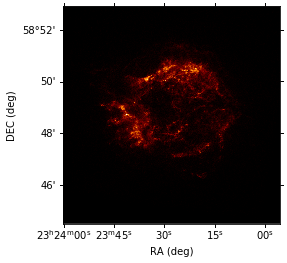

In [81]:
ax = plt.subplot(projection=wcs)
ax.imshow(image_hdu.data, cmap='afmhot', origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

And we get the plot with the x-axis and y-axis in sky coordinates. 

We can add a coordinate grid with `ax.grid()`:

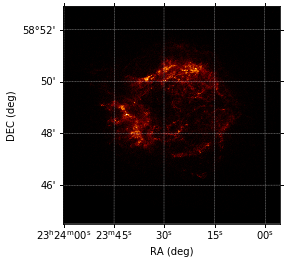

In [82]:
ax.grid(linewidth=0.3, linestyle='dashed', color='white')
ax.figure

We add a white cross to mark the center position of `'Cas A'`:

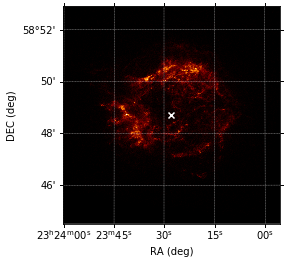

In [83]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg
ax.scatter(ra, dec, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.figure

### 5.1 Exercises

- (*easy*) Make a combined plot of the Chandra data for all energy bands side by side (one row, three columns)
and put the energy information in the title of the subplot. You can use e.g. `plt.subplot()` (check the matplotlib documentation).  
- (*advanced*) Make a combined RGB image of the Chandra data in different energy bands. Therefore you have to
renormalize the data per energy band to the maximum value of respective energy band and combine the data into a 3d array with a shape that is compatible with `plt.imshow()` (check the matplotlib documentation!). You can also try to experiment with the Astropy function [make_lupton_rgb](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#astropy.visualization.make_lupton_rgb). For this you can find a [tutorial in the Astropy documentation](http://docs.astropy.org/en/stable/visualization/lupton_rgb.html).

## Acknowledgements
![](asterics_log.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).